In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [8]:
data = pd.read_csv('Real estate.csv')
data = data.set_index('No')
data.rename(columns={'X1 transaction date': 'transaction_date','X2 house age':'house_age', 
                        'X3 distance to the nearest MRT station':'distance to the nearest MRT station',
                       'X4 number of convenience stores':'number of convenience stores','X5 latitude':'latitude',
                       'X6 longitude':'longitude', 'Y house price of unit area':'house price of unit area'}, inplace=True)
data.head()

,transaction_date,house_age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Data preprocessing and analysis

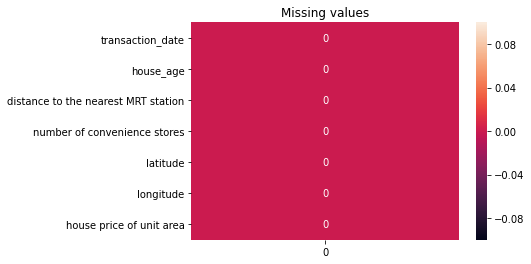

In [10]:
#Looking for missing data
plt.title('Missing values')
ax = sns.heatmap(data.isna().sum().to_frame(), annot=True)
plt.show()

We observe that the distance to the nearest MRT and the number of convenience stores are more correlated with the housing price

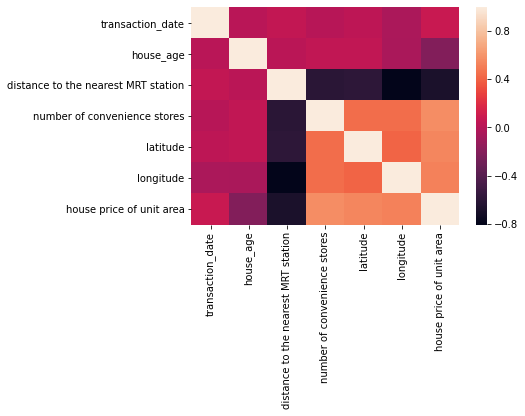

In [14]:
#Correlation between features
correlation = data.corr('pearson')
ax = sns.heatmap(correlation)
plt.show()

D:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in

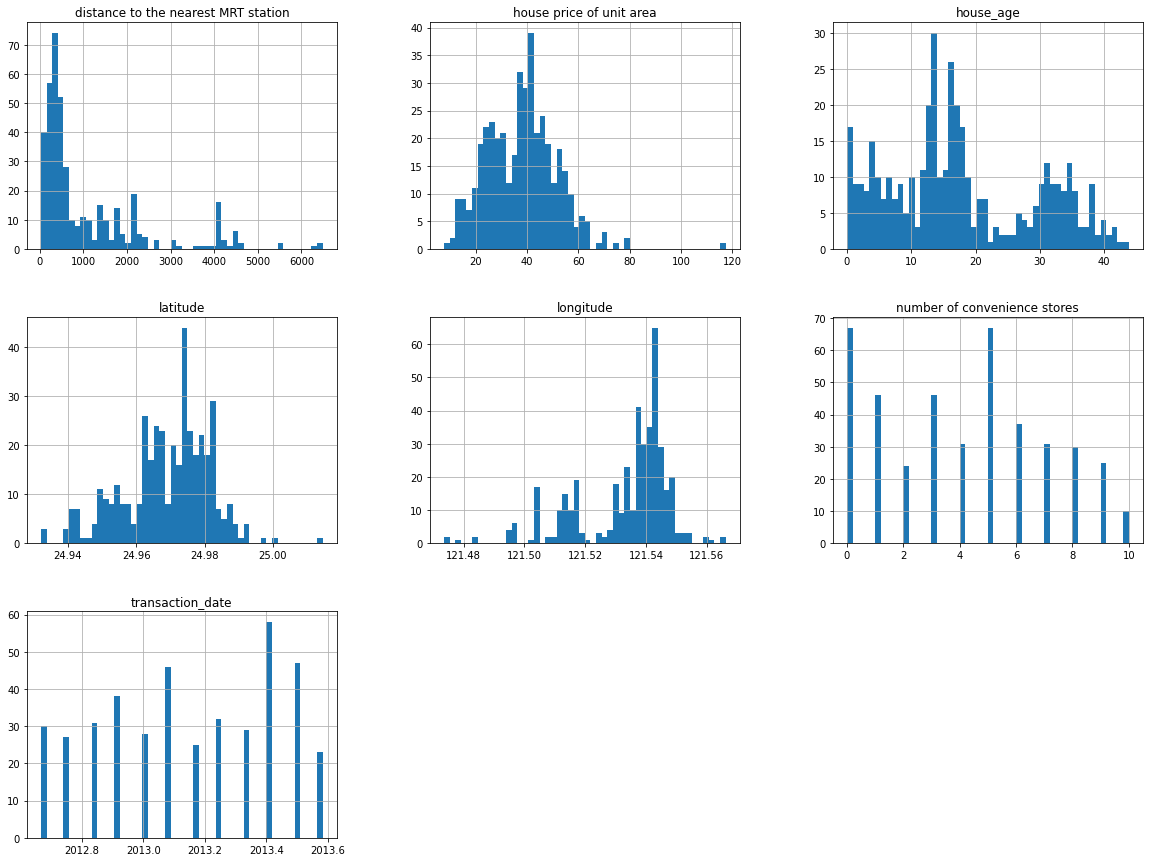

In [16]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# Model building

In [28]:
#shuffle the data 
data_shuffled = shuffle(data,random_state=42)
x = data_shuffled.drop(columns=['house price of unit area'])
y = data_shuffled['house price of unit area']

In [29]:
#Splitting the data
X_train,X_test, y_train,y_test = train_test_split(x,y,random_state=42)

In [31]:
DT_pipe = Pipeline(steps=[('scale',StandardScaler()), ('DT',DecisionTreeRegressor())])
RF_pipe = Pipeline(steps=[('scale',StandardScaler()),('RF',RandomForestRegressor())])
SVR_pipe = Pipeline(steps=[('scale',StandardScaler()),('SVR',SVR())])

In [55]:
DT_cross = cross_val_score(DT_pipe,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
RF_cross = cross_val_score(RF_pipe, X_train, y_train, cv =10,scoring='neg_mean_squared_error')
SVR_cross = cross_val_score(SVR_pipe, X_train, y_train, cv=10,scoring='neg_mean_squared_error')

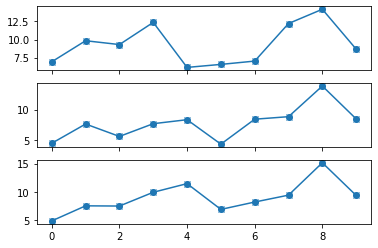

In [72]:
fig, axs = plt.subplots(3, 1,sharex=True)
axs[0].scatter(list(range(0,len(DT_cross))),np.sqrt(-DT_cross))
axs[0].plot(list(range(0,len(DT_cross))),np.sqrt(-DT_cross),'-x')
axs[1].scatter(x=list(range(0,len(RF_cross))),y=np.sqrt(-RF_cross))
axs[1].plot(list(range(0,len(RF_cross))),np.sqrt(-RF_cross),'-x')
axs[2].scatter(x=list(range(0,len(SVR_cross))),y=np.sqrt(-SVR_cross))
axs[2].plot(list(range(0,len(SVR_cross))),np.sqrt(-SVR_cross),'-x')

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [75]:
#Train and test the models
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svr = SVR()
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
svr.fit(x_train,y_train)

SVR()

In [76]:
#Predict results
dt_predictions = dt.predict(x_test)
rf_predictions = rf.predict(x_test)
svr_predictions = svr.predict(x_test)

In [78]:
print('Decision tree results',np.sqrt(mean_squared_error(y_test,dt_predictions)))
print('Random Forest results',np.sqrt(mean_squared_error(y_test,rf_predictions)))
print('svr results',np.sqrt(mean_squared_error(y_test,svr_predictions)))

Decision tree results 7.58975935820001
Random Forest results 6.567808816998854
svr results 7.6297914286696376


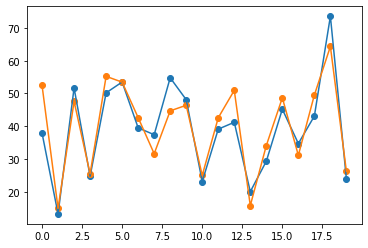

In [89]:
#Random forest being the best let's project its 20 first output
plt.scatter(list(range(0,len(y_test[:20]))),y_test[:20])
plt.plot(list(range(0,len(y_test[:20]))),y_test[:20])
plt.scatter(list(range(0,len(y_test[:20]))),rf_predictions[:20])
plt.plot(list(range(0,len(y_test[:20]))),rf_predictions[:20])